# 1. Overview

Based on the descriptive and exploratory analysis done in notebook 00_data_understanding, this Python Script will work on 2 models: logistic and decission tree classifier, we will chose the best model based on the one that has better evaluation metrics. We will then improve the chosen model with tuned hyperparameters.

# 2. Data Understanding

## 2.1 Data Description

This notebook will use the dataset: df_data_processed excel sheet created in the previous notebook: 01_data_preprocessing

## 2.2 Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.exceptions import ConvergenceWarning


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, recall_score

import pickle
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.simplefilter('ignore')

# 3. Code

## 3.1 Import the database

In [2]:
df = pd.read_excel('df_data_processed.xlsx')
df.head()

,amount_tsh,gps_height,population,basin,region,extraction_type_class,payment_type,source_type,waterpoint_type,installer_type,...,funder_type_international aid,funder_type_ngo,funder_type_private companies,funder_type_religious organizations,scheme_management_grouped_government,scheme_management_grouped_other,scheme_management_grouped_private sector,scheme_management_grouped_water board,status_group,is_test
0,-0.084999,2.053863,-0.041306,-0.540016,-0.633090,-0.521411,-0.897587,-1.112570,-0.510890,-0.005208,...,0,0,0,0,0,0,0,1,0,0
1,-0.100621,-0.965049,-0.379739,-0.540016,0.555492,-0.463637,0.771866,0.850673,-0.359301,3.266280,...,0,0,0,0,1,0,0,0,0,0
2,-0.100621,-0.965049,-0.379739,1.471270,0.131062,2.617222,0.771866,0.850673,2.622191,-0.005208,...,0,0,0,0,1,0,0,0,1,0
3,-0.100621,-0.965049,-0.379739,-1.053126,0.131062,-0.521411,-1.330306,-0.540840,-0.510890,-0.005208,...,1,0,0,0,1,0,0,0,1,0
4,-0.006889,0.511216,-0.125914,0.697368,0.135714,2.617222,-0.641415,0.850673,2.622191,-0.005208,...,0,0,0,0,1,0,0,0,1,0


In [3]:
df.shape

(59400, 36)

## 3.2 Import the database

In [4]:
df_train = df[df['is_test']==0]
df_test = df[df['is_test']==1]

In [5]:
y_train = df_train['status_group']
X_train = df_train.drop(['status_group','is_test'], axis=1)

y_test = df_test['status_group']
X_test = df_test.drop(['status_group','is_test'], axis=1)

## 3.3 Baseline model creations

### 3.3.1 Logistic regression

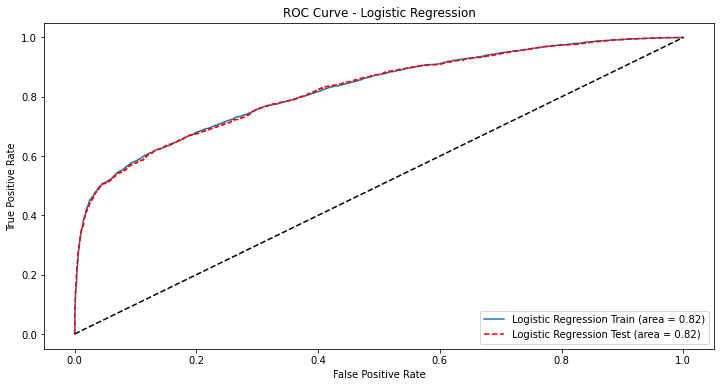

In [6]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_log_reg_train = log_reg.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_log_reg_test = log_reg.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_log_reg_train, tpr_log_reg_train, _ = roc_curve(y_train, y_pred_prob_log_reg_train)
auc_log_reg_train = auc(fpr_log_reg_train, tpr_log_reg_train)

# Compute ROC curve and AUC for test data
fpr_log_reg_test, tpr_log_reg_test, _ = roc_curve(y_test, y_pred_prob_log_reg_test)
auc_log_reg_test = auc(fpr_log_reg_test, tpr_log_reg_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_log_reg_train, tpr_log_reg_train, label='Logistic Regression Train (area = {:.2f})'.format(auc_log_reg_train))
plt.plot(fpr_log_reg_test, tpr_log_reg_test, color='red', linestyle='--', label='Logistic Regression Test (area = {:.2f})'.format(auc_log_reg_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### 3.3.2 Decision Tree

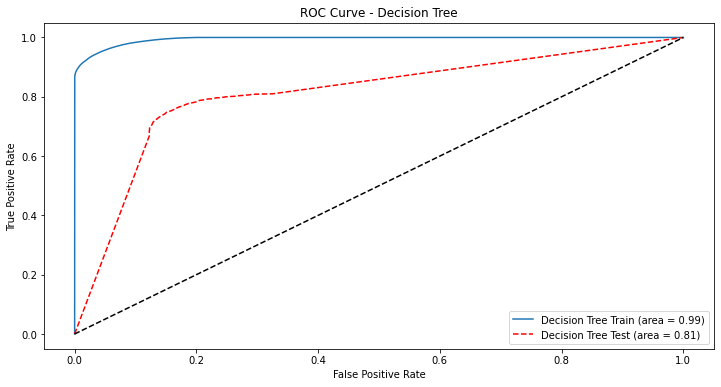

In [7]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_tree_train = decision_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_tree_test = decision_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_prob_tree_test)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

#### checking max_depth to mitigate overfitting

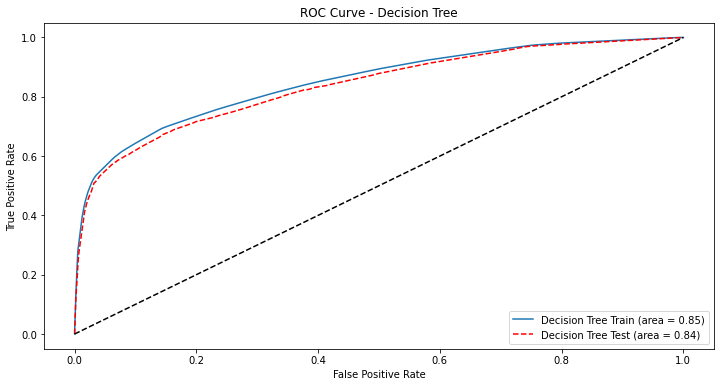

In [8]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=7)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_tree_train = decision_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_tree_test = decision_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_prob_tree_test)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## 3.4 Hyper tuning

### 3.4.1 Decision Tree Classifier

We are going to do hyper parameter tuning with Decision Tree classifier and the Logistic regression and we will keep the model that gives the best results

The code below is commented as it takes an approximated time of 20 minutes for it to run. However, in the following cell you can see that the best_tree is saved in a pickle

In [9]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(class_weight="balanced")

# Define the parameter grid to search
param_grid = {
    'max_depth': range(8, 13),  # Explore depths from 7 to 11
    'min_samples_split': range(3, 7, 2),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': range(2, 5),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'log2', None]  # Number of features to consider when looking for the best split
}

# Define the scoring function using AUC
scorer = make_scorer(recall_score, average='binary')

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring=scorer, cv=5)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Find the best model
best_tree = grid_search.best_estimator_

In [10]:
# Output the best parameter combination and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best Recall achieved:", grid_search.best_score_)

# Optional: Evaluate the best model on the test set
y_pred_proba_best_tree = best_tree.predict_proba(X_test)[:, 1]

# Let's apply a threshold to the probabilities of y_pred_proba_best_tree to determine y_pred_dt
y_pred_dt = np.where(y_pred_proba_best_tree >= 0.40, 1, 0)

test_recall = recall_score(y_test, y_pred_dt)

print("Test Recall of best model:", test_recall)

Best parameters found: {'max_depth': 12, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 3}
Best Recall achieved: 0.7383857002960346
Test Recall of best model: 0.7900262467191601


In [11]:
# Save the best_tree in a pickle
pickle.dump(best_tree, open(f"model_objects/best_tree.pkl", 'wb'))

Let's do the curve ROC and see the values AUC with the values for this Decision TreeClassifier 

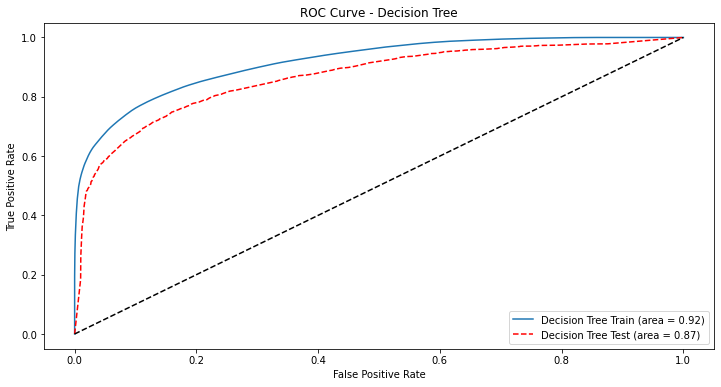

In [12]:
# Predict probabilities on the training and test set
y_pred_prob_tree_train = best_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_proba_best_tree = best_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_proba_best_tree)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### 3.4.2 logistic regression

We are going to comment the cell below as it takes an approximate time of 20 minutes for it to run. 

In [13]:
# Initialize the Logistic Regression model
logistic_regression = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200],  # Maximum number of iterations taken for the solvers to converge
}

# Define the scoring function using AUC
scorer = make_scorer(recall_score, average='binary')

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, scoring=scorer, cv=5)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Find the best model
best_log_reg = grid_search.best_estimator_



In [14]:
# Output the best parameter combination and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best Recall achieved:", grid_search.best_score_)

# Let's apply a threshold to the probabilities of y_pred_prob_log_reg_test to determine y_pred
y_pred_prob_log_reg_test = best_log_reg.predict_proba(X_test)[:, 1]  # Test probabilities
y_pred_lr = np.where(y_pred_prob_log_reg_test >= 0.40, 1, 0)

test_recall_lr = recall_score(y_test, y_pred_lr)

print("Test Recall of best model:", test_recall_lr)

Best parameters found: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Best Recall achieved: 0.5513373780124042
Test Recall of best model: 0.6233595800524935


Let's do the curve ROC and see the values AUC with the values for this Logistic Regressor 

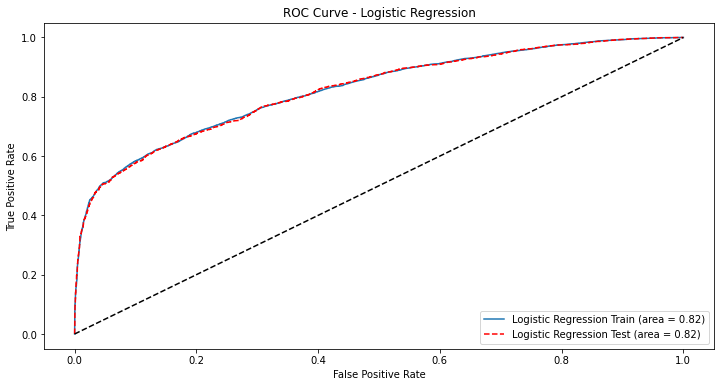

In [15]:
# Predict probabilities on the training and test set using the Logistic Regression model
y_pred_prob_log_reg_train = best_log_reg.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_log_reg_test = best_log_reg.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_log_reg_train, tpr_log_reg_train, _ = roc_curve(y_train, y_pred_prob_log_reg_train)
auc_log_reg_train = auc(fpr_log_reg_train, tpr_log_reg_train)

# Compute ROC curve and AUC for test data
fpr_log_reg_test, tpr_log_reg_test, _ = roc_curve(y_test, y_pred_prob_log_reg_test)
auc_log_reg_test = auc(fpr_log_reg_test, tpr_log_reg_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_log_reg_train, tpr_log_reg_train, label='Logistic Regression Train (area = {:.2f})'.format(auc_log_reg_train))
plt.plot(fpr_log_reg_test, tpr_log_reg_test, color='red', linestyle='--', label='Logistic Regression Test (area = {:.2f})'.format(auc_log_reg_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


## 3.5 Confusion matrix

### 3.5.1 Decision Tree Classifier

In [21]:
# Confusion Matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_dt)

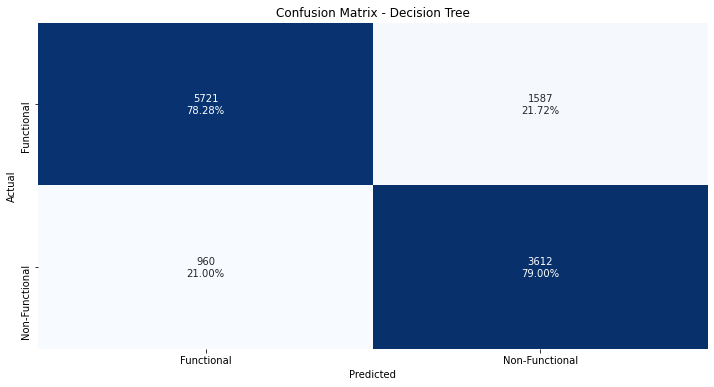

In [22]:
# Normalize the confusion matrix by row (actual class)
cm_tree_normalized = cm_tree.astype('float') / cm_tree.sum(axis=1)[:, np.newaxis]

# Create labels for each cell
labels = np.array([["{0}\n{1:.2%}".format(value, percentage) for value, percentage in zip(row, row_normalized)]
                   for row, row_normalized in zip(cm_tree, cm_tree_normalized)])

# Plotting the Confusion Matrix for Decision Tree
plt.figure(figsize=(12, 6))
sns.heatmap(cm_tree_normalized, annot=labels, fmt='', cmap='Blues', xticklabels=['Functional', 'Non-Functional'], yticklabels=['Functional', 'Non-Functional'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

False Negatives (FN): 21.19%

- Impact: A high rate of false negatives means that a significant proportion of the positive class (e.g., non-functional pumps) is being misclassified as negative (e.g., functional pumps). This could lead to serious issues in the business context, as non-functional pumps that are not identified will not receive the necessary maintenance or repairs, leading to prolonged downtimes and possibly affecting the service quality and user satisfaction.
- Business Problem Impact: This could result in increased downtime for the pumps, higher maintenance costs over time, and a negative impact on customer satisfaction due to unreliable water supply.

False Positives (FP): 21.61%

- Impact: A relatively low rate of false positives indicates that only a small proportion of the negative class (e.g., functional pumps) is being misclassified as positive (e.g., non-functional pumps). While this is less severe compared to false negatives, it still leads to unnecessary maintenance actions being taken on functional pumps.
- Business Problem Impact: This could lead to inefficient allocation of resources, where time and effort are spent on checking or repairing pumps that are actually functional. This can increase operational costs and divert attention from genuinely non-functional pumps that need repairs.

### 3.5.2 Logistic Regression

In [23]:
# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_lr)

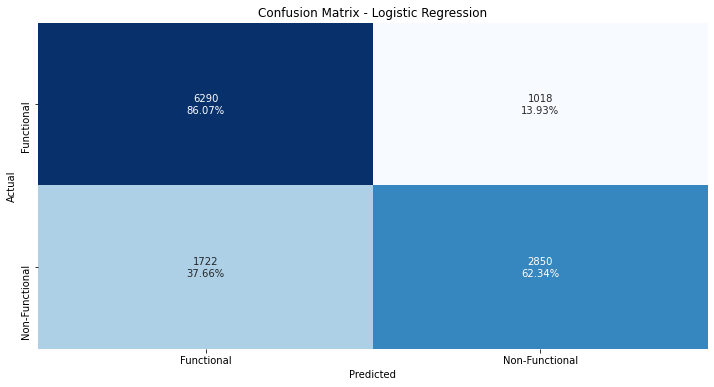

In [24]:
# Normalize the confusion matrix by row (actual class)
cm_log_reg_normalized = cm_log_reg.astype('float') / cm_log_reg.sum(axis=1)[:, np.newaxis]

# Create labels for each cell
labels = np.array([["{0}\n{1:.2%}".format(value, percentage) for value, percentage in zip(row, row_normalized)]
                   for row, row_normalized in zip(cm_log_reg, cm_log_reg_normalized)])

# Plotting the Confusion Matrix for Logistic Regression
plt.figure(figsize=(12, 6))
sns.heatmap(cm_log_reg_normalized, annot=labels, fmt='', cmap='Blues',
            xticklabels=['Functional', 'Non-Functional'], yticklabels=['Functional', 'Non-Functional'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

The logistic regression model has a False negatives of 37.66%, which is greater than the one of the Decision Tree model that has a False negative percentage of 21.19%. This is the most critical metric that we want to ensure is very small because the False Negative percentage represents the risk of undetected non-functional pumps. Predicting a pump as functional when in reality it turns out to be non-functional could be fatal for certain communities. 

In all, considering that the Logistic Regression model has a higher False negative than the Decision Tree model, we decide to use the Decission Tree Model Classifier

# 4. Feature importance

We are now going to execute a feature importance code to be able to see the level of importance of all variables when doing the predictions

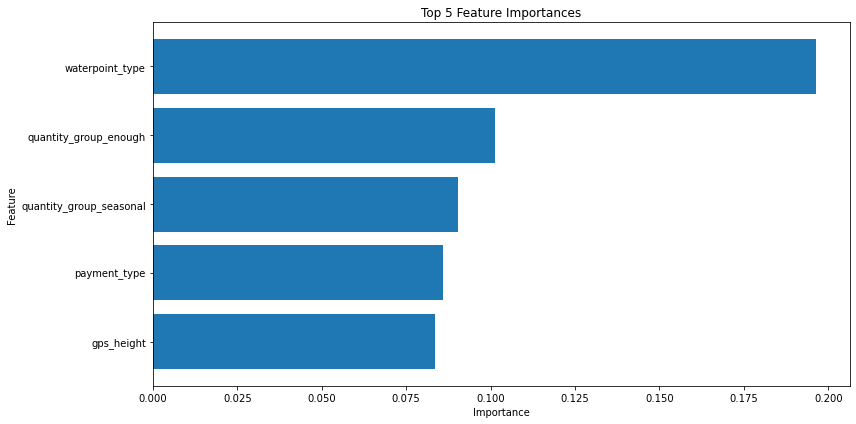

In [25]:
# Obtain the most important features affecting the status of a pump
importances = best_tree.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Create a bar graph for the importance of the characteristics
# Order importances in descending order
indexes = np.argsort(importances)[::-1]

# Get the top 5 important features
top_indexes = indexes[:5]

plt.figure(figsize=(12, 6))
plt.title("Top 5 Feature Importances")
plt.barh(range(5), importances[top_indexes], align="center")
plt.yticks(range(5), feature_names[top_indexes])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
plt.show()

# 5. Conclusion

Considering the distribution of the dependent variable

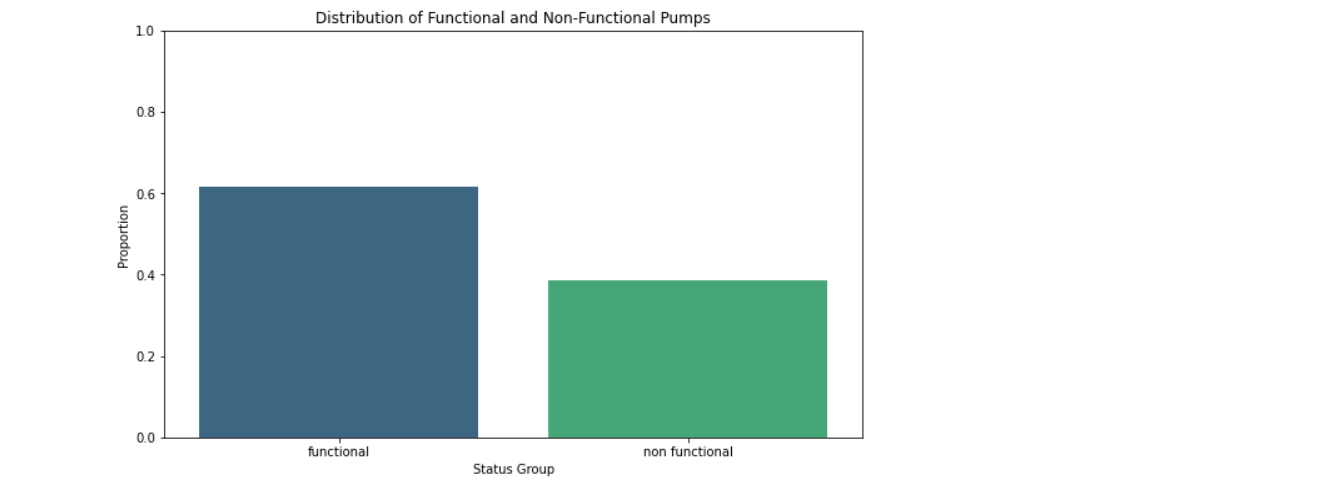

As we can see there is not an imbalance problem even though the majority of pumps are functional. 

Diving into the model results, let's begin by looking into the confusion matrix

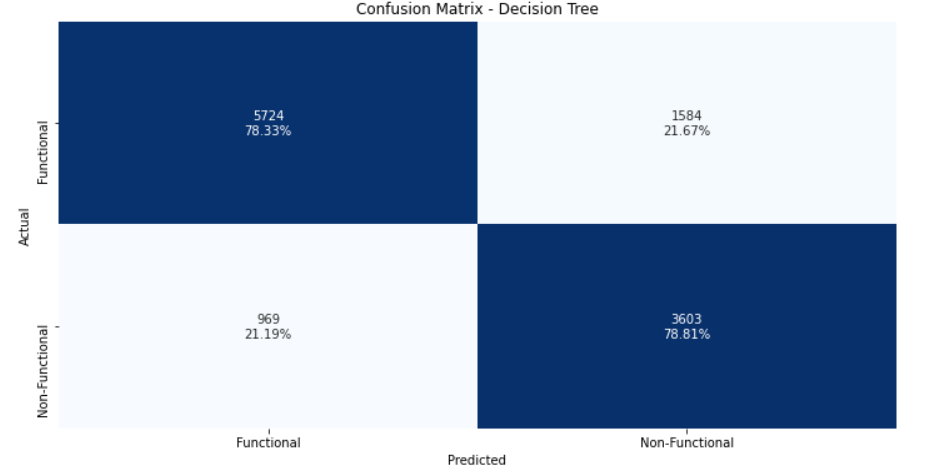

The confusion matrix indicates that the model has a relatively low rate of false negatives (21.19%). The false positive rate (21.67%) is relatively low, meaning fewer resources will be wasted on unnecessary maintenance. However, the primary concern should be reducing the false negative rate to ensure that non-functional pumps are correctly identified and repaired promptly. The result is now 21.19%, which is somewhat low and satisfactory, but further progress should be made to reduce this even further.

Based on the metrics, the best Recall score is obtained with a Decision Tree Classifier. Moreover, the AUC for this model is of 0.87 for the test. In the case of the Logistic Regression model, the recall score was worse even and it had an AUC score (of 0.82).

The variables that are most important and that permit us to best descriminate are:
1. waterpoint_type
2. quantity_group
3. payment_type

We are interested in these 3 variables because they are the ones that have the most influence when determining whether a pump is functional or non-functional. 

Here we will show the contingency tables for each variable divided into functional, functional with repairs, and non functional pumps:

1. 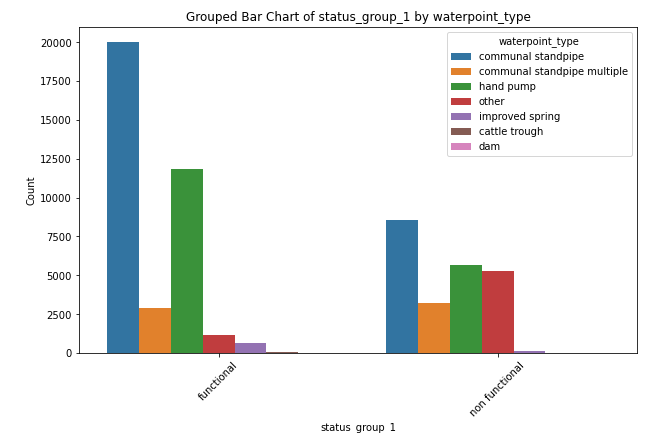
    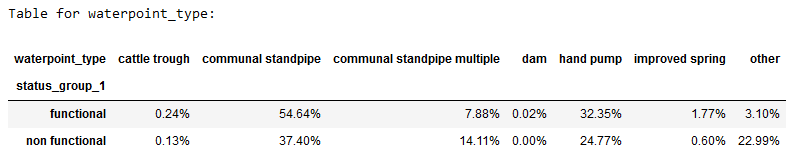

-------------------------

2. 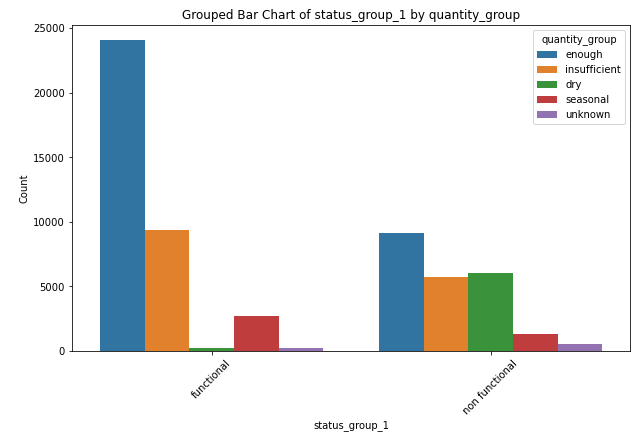
    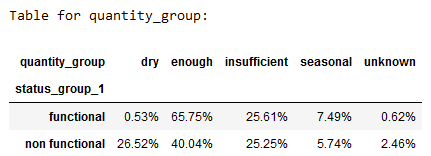

-------------------------
3. 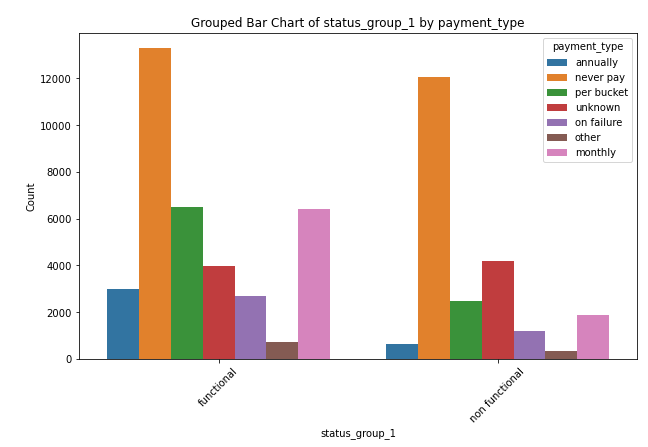
    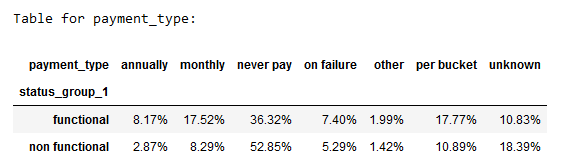
 

# 6. Recommendations

1. Considering that most of the functional pumps have monthly payment plans or a per bucket, the Tanzanian government can consider modifying the existing payment plans of those pumps where the payments are different from those payment types, so that the chance of the pump being functional can be increased.

2. Considering that almost none of the functional pumps are dry, it is possible to verify which pumps are dry as a proxy variable to know if they are functional or not and thus focus efforts on repairing them.

3. Considering that non-functional pumps have in most cases a waterpoint_type different from cattle trough, communal standpipe, communal standpipe multiple, dam, hand pump and improved spring, it is possible to verify which pumps do not have these waterpoint_types as a proxy variable to know if they are functional or not and thus focus efforts on repairing them.